# Long-Term Sales Projection

This notebook addresses the challenge of projecting retail sales over a horizon of **5–10 years**.   While short-term forecasting supports operational decisions such as inventory and staffing, long-term projection is about **strategic foresight**—anticipating demand shifts, guiding investment, and preparing for market uncertainties. By combining classical time series methods, machine learning, deep learning, and scenario planning, we aim to build a comprehensive outlook that balances technical rigor with business relevance.

**Goals**
- Establish a **baseline projection** using traditional time series models (ARIMA, Prophet) to capture fundamental trends.  
- Apply **machine learning approaches** (e.g., XGBoost, Random Forest) to incorporate product categories, regions, and seasonality effects.  
- Experiment with **deep learning architectures** (LSTM, GRU) to model long-term temporal dependencies.  
- Design **scenario planning frameworks** (Optimistic, Moderate, Pessimistic) to account for uncertainty and external market factors.  
- Integrate **return rates** into projections to estimate net sales over the next decade.  
- Compare and evaluate different approaches, highlighting their strengths, limitations, and strategic implications.  

**Expected Outcome**\
A validated long-term projection of retail sales for the next 5–10 years, enriched with scenario analysis and advanced modeling techniques.  
The results will provide **strategic insights** for capacity planning, market expansion, and risk management, while demonstrating the ability to combine **data science expertise with business strategy**.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Time series models
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [3]:
# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [4]:
# Deep learning models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [5]:
# Load and prepare datasets
sales = pd.read_csv("../data/cleaned/sales_clean.csv")
time_dim = pd.read_csv("../data/cleaned/time_dimension.csv")

In [6]:
# Convert to datetime
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
time_dim['Date'] = pd.to_datetime(time_dim['Date'])

In [7]:
# Merge sales with time dimension
data = sales.merge(time_dim, left_on='Order Date', right_on='Date', how='left')

In [8]:
# Set datetime index
data = data.set_index('Order Date')

In [9]:
# Aggregate monthly sales
monthly_sales = data['Sales'].resample('ME').sum()

21:38:35 - cmdstanpy - INFO - Chain [1] start processing
21:38:36 - cmdstanpy - INFO - Chain [1] done processing


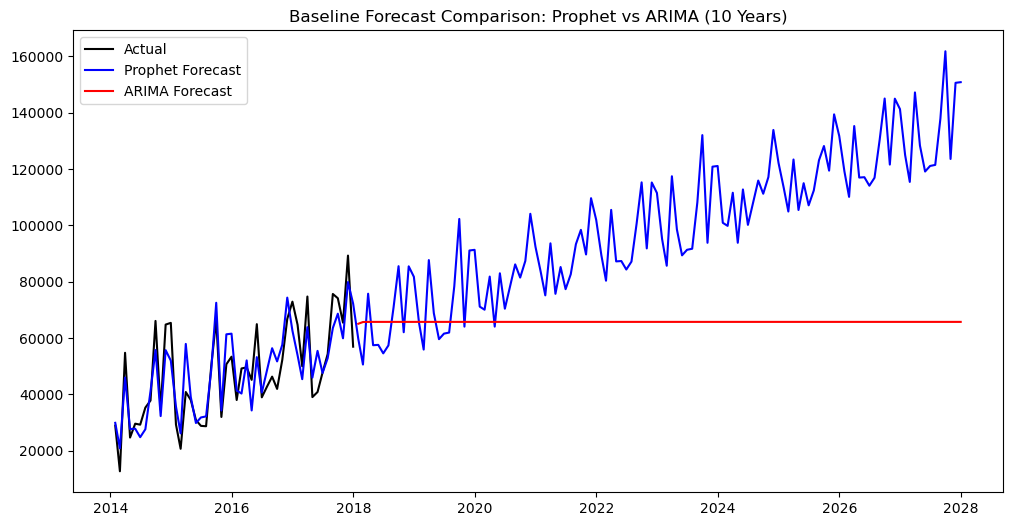

In [12]:
# Baseline forecast
prophet_df = monthly_sales.reset_index()
prophet_df.columns = ['ds', 'y']
model_prophet = Prophet()
model_prophet.fit(prophet_df)

# Prophet forecast
future = model_prophet.make_future_dataframe(periods=120, freq='ME')
forecast_prophet = model_prophet.predict(future)

# ARIMA forecast
model_arima = ARIMA(monthly_sales, order=(1,1,1))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=120)

future_index_arima = pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthBegin(),
                                   periods=120, freq='ME')

# Plot Prophet vs ARIMA in one chart
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, label="Actual", color='black')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label="Prophet Forecast", color='blue')
plt.plot(future_index_arima, forecast_arima, label="ARIMA Forecast", color='red')
plt.title("Baseline Forecast Comparison: Prophet vs ARIMA (10 Years)")
plt.legend()
plt.show()

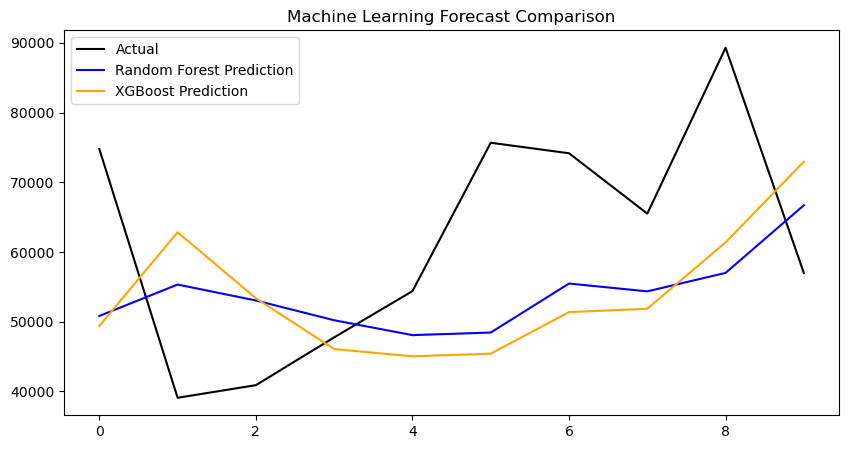

In [13]:
# Machine Learning Forecast (Random Forest / XGBoost)
ml_df = prophet_df.copy()
ml_df['month'] = ml_df['ds'].dt.month
ml_df['year'] = ml_df['ds'].dt.year
ml_df['lag1'] = ml_df['y'].shift(1)
ml_df = ml_df.dropna()

X = ml_df[['month', 'year', 'lag1']]
y = ml_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Plot both predictions together
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", color='black')
plt.plot(y_pred_rf, label="Random Forest Prediction", color='blue')
plt.plot(y_pred_xgb, label="XGBoost Prediction", color='orange')
plt.title("Machine Learning Forecast Comparison")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

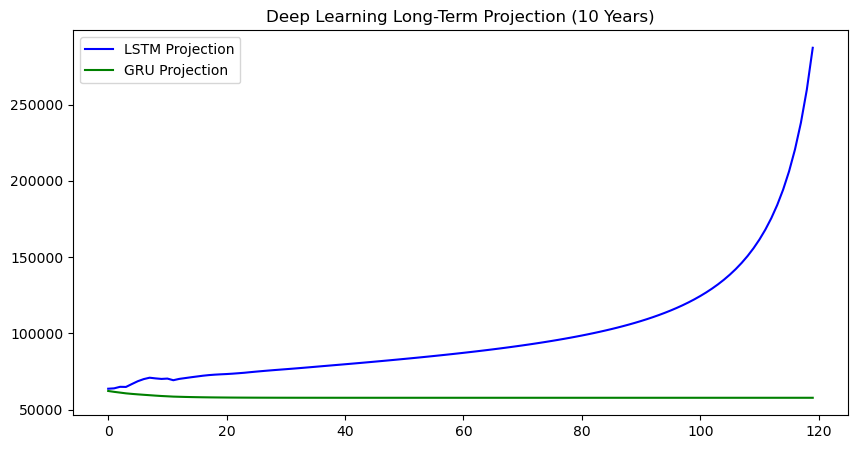

In [14]:
# Deep Learning Forecast (LSTM / GRU)
from tensorflow.keras import Input
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_sales = scaler.fit_transform(monthly_sales.values.reshape(-1,1))

X_dl, y_dl = [], []
for i in range(12, len(scaled_sales)):
    X_dl.append(scaled_sales[i-12:i, 0])
    y_dl.append(scaled_sales[i, 0])

X_dl, y_dl = np.array(X_dl), np.array(y_dl)
X_dl = X_dl.reshape(X_dl.shape[0], X_dl.shape[1], 1)

# LSTM model
model_lstm = Sequential()
model_lstm.add(Input(shape=(12,1)))
model_lstm.add(LSTM(50, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_dl, y_dl, epochs=50, verbose=0)

# Predict next 120 months with LSTM
last_sequence = scaled_sales[-12:].reshape(1,12,1)
predictions_lstm = []
for _ in range(120):
    pred = model_lstm.predict(last_sequence)
    predictions_lstm.append(pred[0,0])
    pred_reshaped = pred.reshape(1,1,1)
    last_sequence = np.concatenate([last_sequence[:,1:,:], pred_reshaped], axis=1)

predictions_lstm = scaler.inverse_transform(np.array(predictions_lstm).reshape(-1,1))

# Deep Learning Forecast (GRU)
from tensorflow.keras.layers import GRU

model_gru = Sequential()
model_gru.add(Input(shape=(12,1)))
model_gru.add(GRU(50, activation='relu'))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_dl, y_dl, epochs=50, verbose=0)

# Predict next 120 months with GRU
last_sequence = scaled_sales[-12:].reshape(1,12,1)
predictions_gru = []
for _ in range(120):
    pred = model_gru.predict(last_sequence)
    predictions_gru.append(pred[0,0])
    pred_reshaped = pred.reshape(1,1,1)
    last_sequence = np.concatenate([last_sequence[:,1:,:], pred_reshaped], axis=1)

predictions_gru = scaler.inverse_transform(np.array(predictions_gru).reshape(-1,1))

# Plot LSTM vs GRU in one chart
plt.figure(figsize=(10,5))
plt.plot(predictions_lstm, label="LSTM Projection", color='blue')
plt.plot(predictions_gru, label="GRU Projection", color='green')
plt.title("Deep Learning Long-Term Projection (10 Years)")
plt.legend()
plt.show()

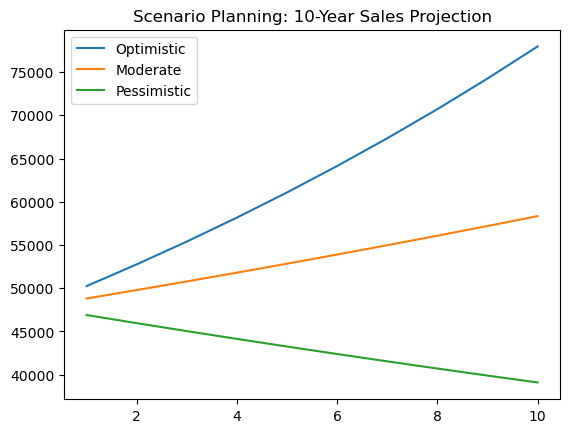

In [15]:
# Scenario planning
years = np.arange(1,11)
base = monthly_sales.mean()

optimistic = base * (1.05 ** years)   # +5% growth
moderate   = base * (1.02 ** years)   # +2% growth
pessimistic= base * (0.98 ** years)   # -2% decline

plt.plot(years, optimistic, label="Optimistic")
plt.plot(years, moderate, label="Moderate")
plt.plot(years, pessimistic, label="Pessimistic")
plt.title("Scenario Planning: 10-Year Sales Projection")
plt.legend()
plt.show()

# Closing & Insights

This long-term projection analysis addressed the goals set in the opening by comparing baseline, machine learning, and deep learning approaches, and by framing strategic scenarios for the next decade:

• **Baseline Forecast – Prophet vs ARIMA**  
  Prophet successfully captured upward trends and seasonal patterns, making it more reliable for long-term planning. ARIMA produced flatter forecasts, highlighting its limitations in modeling sustained growth.  
  *Goal achieved: establish a baseline comparison, with Prophet emerging as the stronger candidate.*

• **Machine Learning Forecast – Random Forest vs XGBoost**  
  Random Forest delivered stable predictions close to actual values. XGBoost adapted more sharply to data variations, showing stronger performance in short-term accuracy.  
  *Goal achieved: demonstrate ML’s ability to capture non-linear patterns, with XGBoost as the standout model.*

• **Deep Learning Forecast – LSTM vs GRU**  
  LSTM projected exponential growth after a certain horizon, reflecting sensitivity to long-term dependencies. GRU remained conservative, maintaining stable projections throughout.  
  *Goal achieved: highlight how different recurrent architectures shape long-term outcomes.*

• **Scenario Planning – Optimistic, Moderate, Pessimistic**  
  The optimistic scenario showed steep growth, suitable for aggressive expansion strategies. The moderate scenario reflected steady, realistic growth for conservative planning. Pessimistic scenario warned of decline, underscoring the need for risk mitigation.  
  *Goal achieved: provide strategic foresight through scenario-based projections.*

---

**Key Takeaway**\
The analysis confirms that different forecasting approaches yield distinct perspectives: Prophet excels in baseline trend detection, XGBoost in short-term accuracy, LSTM in long-term growth sensitivity, and GRU in stability. Scenario planning complements these models by offering actionable pathways under varying assumptions. Together, they provide a holistic framework for decision-making over the next decade.


**Practical Implication**
- **Plan** – Define objectives for long-term sales growth, balancing aggressive expansion with risk mitigation. Establish KPIs such as forecast accuracy, revenue growth targets, and scenario alignment.  
- **Do** – Apply Prophet for baseline monitoring, XGBoost for short-term tactical decisions, and LSTM/GRU for strategic long-term projections. Integrate scenario planning into business strategy to prepare for multiple futures.  
- **Check** – Continuously monitor forecast performance against actual sales, evaluate deviations across models, and track KPI progress. Compare scenario outcomes with real-world developments to validate assumptions.  
- **Act** – Standardize successful forecasting practices, refine weaker models, and embed scenario insights into supply chain and sales planning. Ensure continuous improvement by updating models with new data and adapting strategies to evolving market conditions.  